In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import seaborn as sns

In [30]:
df_preproducer_imputed = pd.read_csv("producer_imputedData.csv", index_col=[0])
df_preproducer_imputed.head()
df_prodHist = pd.read_csv("production_history.csv")


In [32]:
## Aggregation feature function
df_agg = df_preproducer_imputed.drop(["Rock facies"], axis = 1)
df_agg = df_agg.groupby("Well_ID").agg("mean")
df_agg.head()

df_agg_merge = df_agg.merge(df_prodHist, how = 'inner', on = 'Well_ID')
df_agg_merge.head()

,Well_ID,"X, m","Y, m","Depth, m","Porosity, fraction","Permeability, mD","Acoustic Impedance, kg*s/m^2","Density, g/cm3","Compressible velocity, m/s","Youngs modulus, GPa","Shear velocity, m/s","Shear modulus, GPa",Vclay,"Cumulative oil production (1 yr), MSTB","Cumulative oil production (2 yr), MSTB","Cumulative oil production (3 yr), MSTB","Cumulative Water production (1 yr), MSTB","Cumulative Water production (2 yr), MSTB","Cumulative Water production (3 yr), MSTB"
0,Well_no_1,7325,7175,3057.550000,0.133426,115.099143,7.221834e+06,2.141876,3392.897466,25.333611,1656.844649,6.192136,0.133335,450.98,684.20,847.33,494.89,1236.40,2108.7
1,Well_no_10,3725,1575,3057.820000,0.112654,74.651251,7.474489e+06,1.827084,4038.679249,30.218813,1682.659828,5.592101,0.399980,229.35,388.35,518.27,222.51,528.21,880.8
2,Well_no_11,4275,5675,3050.470000,0.128556,92.894287,7.286664e+06,2.086964,3527.987993,26.446185,1681.960101,6.187106,0.233325,512.80,791.55,978.14,189.40,589.27,1120.3
3,Well_no_12,1625,3775,3057.797368,0.126319,108.875384,7.324012e+06,1.918122,3841.739107,29.032313,1627.507010,5.216026,0.280689,422.81,659.42,840.47,380.47,987.10,1714.1
4,Well_no_13,5175,8875,3058.566316,0.137389,105.816837,7.299270e+06,2.077762,3742.859030,26.852747,1667.159259,5.869177,0.175437,357.06,569.71,732.29,536.04,1243.10,2049.9


In [48]:
dropData = ["Well_ID", "Cumulative oil production (1 yr), MSTB", "Cumulative oil production (2 yr), MSTB",
           "Cumulative oil production (3 yr), MSTB", "Cumulative Water production (1 yr), MSTB",
           "Cumulative Water production (2 yr), MSTB", "Cumulative Water production (3 yr), MSTB"]

df_agg_data = df_agg_merge.drop(dropData, axis = 1)
df_agg_target = df_agg_merge["Cumulative oil production (3 yr), MSTB"]

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
train, test, target, target_test = train_test_split(df_agg_data, df_agg_target, test_size=0.2, random_state=0)

In [36]:
from sklearn.ensemble import RandomForestRegressor
randomF = RandomForestRegressor(max_depth = 300, random_state=0)
score = cross_val_score(randomF, train, target, cv = 5, scoring='neg_mean_absolute_error')

score

array([-128.4298    , -216.91765833, -293.52255   , -124.69565455,
       -178.28121818])

In [37]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(train, target)

RandomForestRegressor(max_depth=2, random_state=0)

Text(0, 0.5, 'Abs Percent error (%)')

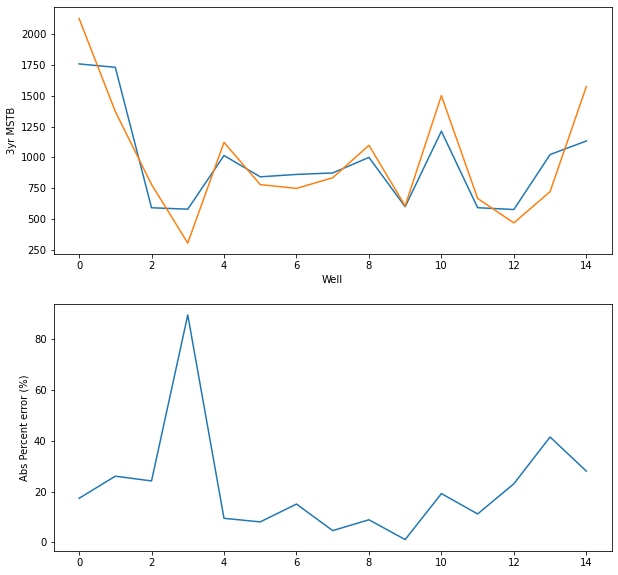

In [38]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 10))
ax[0].plot(np.arange(test.shape[0]), regr.predict(test)) 
ax[0].plot(np.arange(test.shape[0]), target_test) 
ax[0].set_xlabel('Well')
ax[0].set_ylabel('3yr MSTB')

ax[1].plot(np.arange(test.shape[0]), np.abs(regr.predict(test) - target_test)/target_test * 100)
ax[1].set_ylabel('Abs Percent error (%)')

In [39]:
np.mean(np.abs(regr.predict(test) - target_test))

188.3308324494577

In [49]:
from sklearn.tree import DecisionTreeRegressor
regs = DecisionTreeRegressor(criterion='mse', splitter='best', max_leaf_nodes = 150)
regs.fit(train, target)

DecisionTreeRegressor(max_leaf_nodes=150)

In [57]:
yPred = regs.predict(test)
regs.score(target_test, yPred)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))
ax[0].plot(np.arange(test.shape[0]), yPred) 
ax[0].plot(np.arange(test.shape[0]), target_test) 
ax[0].set_xlabel('Well')
ax[0].set_ylabel('3yr MSTB')


ValueError: Expected 2D array, got 1D array instead:
array=[2124.8  1372.2   781.4   307.12 1122.1   780.12  749.4   835.5  1098.1
  608.09 1500.    668.02  470.12  723.75 1573.2 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

748191.7507999999

In [55]:
target_test.shape

(15,)

Text(0, 0.5, 'Abs Percent error (%)')

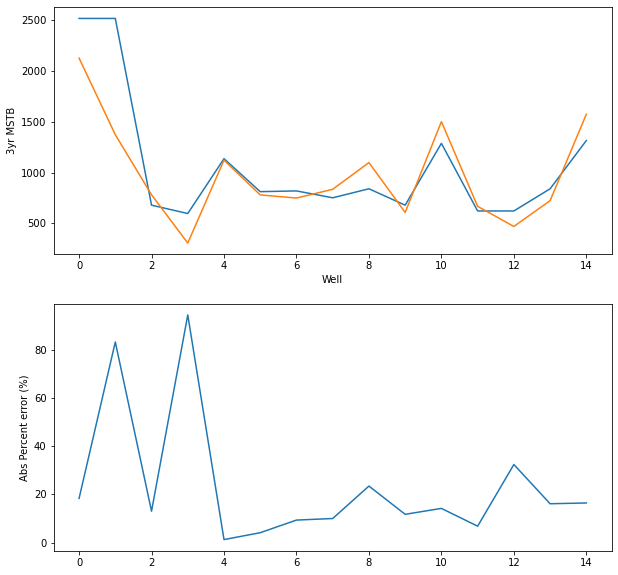

In [45]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 10))
ax[0].plot(np.arange(test.shape[0]), regs.predict(test)) 
ax[0].plot(np.arange(test.shape[0]), target_test) 
ax[0].set_xlabel('Well')
ax[0].set_ylabel('3yr MSTB')

ax[1].plot(np.arange(test.shape[0]), np.abs(regs.predict(test) - target_test)/target_test * 100)
ax[1].set_ylabel('Abs Percent error (%)')

## Kriging map

In [62]:
df_agg_data.head(2)

,"X, m","Y, m","Depth, m","Porosity, fraction","Permeability, mD","Acoustic Impedance, kg*s/m^2","Density, g/cm3","Compressible velocity, m/s","Youngs modulus, GPa","Shear velocity, m/s","Shear modulus, GPa",Vclay
0,7325,7175,3057.55,0.133426,115.099143,7.221834e+06,2.141876,3392.897466,25.333611,1656.844649,6.192136,0.133335
1,3725,1575,3057.82,0.112654,74.651251,7.474489e+06,1.827084,4038.679249,30.218813,1682.659828,5.592101,0.399980


In [63]:
df_agg_target.head(2)

0    847.33
1    518.27
Name: Cumulative oil production (3 yr), MSTB, dtype: float64

In [ ]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Input space
X = np.array(list(zip(df_agg_data['X, m'], df_agg_data['Y, m'])))
X = X/10000
x1 = np.linspace(X[:,0].min(), X[:,0].max()) #p
x2 = np.linspace(X[:,1].min(), X[:,1].max()) #q
x = (np.array([x1, x2])).T

kernel = C(1.0, (1e-3, 1e3)) * RBF([2,2], (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)

gp.fit(X, y)

x1x2 = np.array(list(product(x1, x2)))
y_pred, MSE = gp.predict(x1x2, return_std=True)

X0p, X1p = x1x2[:,0].reshape(50,50), x1x2[:,1].reshape(50,50)
Zp = np.reshape(y_pred,(50,50))

# alternative way to generate equivalent X0p, X1p, Zp
# X0p, X1p = np.meshgrid(x1, x2)
# Zp = [gp.predict([(X0p[i, j], X1p[i, j]) for i in range(X0p.shape[0])]) for j in range(X0p.shape[1])]
# Zp = np.array(Zp).T

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.pcolormesh(X0p, X1p, Zp)
plt.gca().invert_yaxis()

plt.show()

In [95]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

df_agg_data2 = df_agg_data.copy()
df_agg_data2['Permeability, mD'].apply(np.log)

df_scaled = (df_agg_data2 - df_agg_data2.min())/ (df_agg_data2.max() - df_agg_data2.min())
df_scaled.head()

X_train, X_test, y_train, y_test = train_test_split(df_scaled, df_agg_target, test_size=0.20, random_state=0)
gp = GaussianProcessRegressor(n_restarts_optimizer=15)

gp.fit(X_train, y_train)

GaussianProcessRegressor(n_restarts_optimizer=15)

In [96]:
y_pred, MSE = gp.predict(X_test, return_std=True)
y_pred

array([2119.64337345, 1636.76352441,  863.35189385,  315.83430104,
        820.78118267,  950.05254851,  779.7889025 ,  817.60629944,
        669.03195372,  505.21153826, 1283.91063213,  844.55215959,
        578.99002951,  929.42331073, 1494.06165538])

In [97]:
np.mean(np.abs(y_pred - y_test)/y_test * 100)

16.074074423209858